In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import itertools
import re
import ipywidgets as widgets
from ipywidgets import interact


### Question 2

In [2]:
import numpy as np

# Generate n samples from N(0,1) for a given sample size
def generate_samples(n):
    return np.random.normal(0, 1, n)

# Example: Generate samples for n = 1000 to n = 100000 with a step of 1000
n_values = np.arange(1000, 100001, 1000)  # Sample sizes from 1000 to 100000

# Function to calculate empirical probability
def empirical_probability(samples, c):
    count = np.sum(samples >= c)
    return count / len(samples)

# Calculate empirical probabilities for each c and n value
c_values = np.arange(0.5, 3.1, 0.1)  # Threshold values from 0.5 to 3.0 with step 0.1

# Store empirical probabilities for all combinations of c and n
empirical_probs = {}
for n in n_values:
    samples = generate_samples(n)  # Generate samples for each n
    empirical_probs[n] = [empirical_probability(samples, c) for c in c_values]


def markov_bound(samples, c):
    mean_X_plus = np.mean(np.maximum(samples, 0))  # mean of X^+
    return mean_X_plus / c

# Calculate Markov bounds for each c and n value
markov_bounds = {}
for n in n_values:
    samples = generate_samples(n)  # Generate samples for each n
    markov_bounds[n] = [markov_bound(samples, c) for c in c_values]


def chebyshev_bound(c, mu=0, sigma=1):
    return sigma**2 / (c - mu)**2

# Calculate Chebyshev bounds for each c
chebyshev_bounds = [chebyshev_bound(c) for c in c_values]


def chernoff_bound(c, mu=0, sigma=1):
    return np.exp(-(c - mu)**2 / (2 * sigma**2))

# Calculate Chernoff bounds for each c
chernoff_bounds = [chernoff_bound(c) for c in c_values]


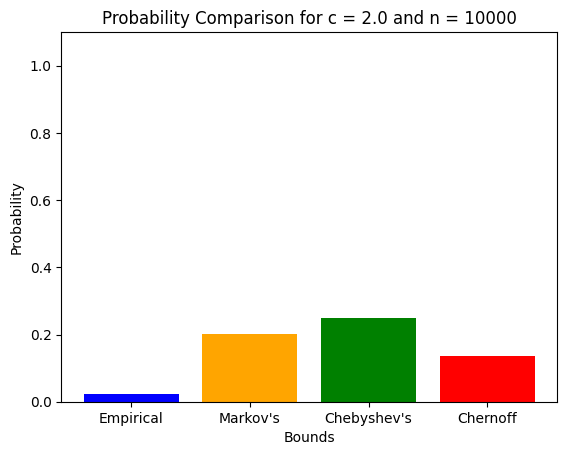

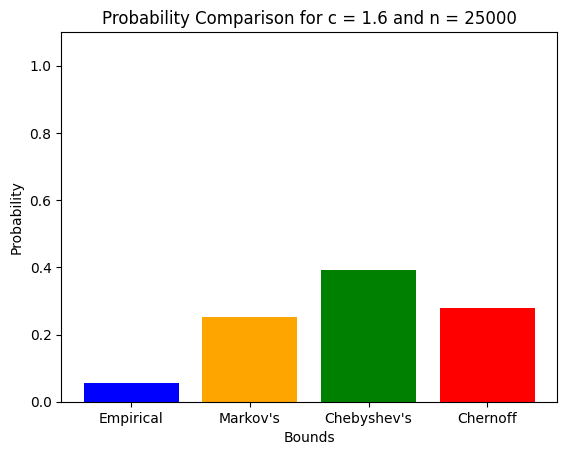

In [3]:
import matplotlib.pyplot as plt

# Plot bar chart comparison for each value of c and n
def plot_bar_comparison(c, n):
    samples = generate_samples(n)  # Generate samples
    empirical_prob = empirical_probability(samples, c)  # Calculate empirical probability
    markov_bound_value = markov_bound(samples, c)  # Markov bound
    chebyshev_bound_value = chebyshev_bound(c)  # Chebyshev bound
    chernoff_bound_value = chernoff_bound(c)  # Chernoff bound

    # Create a bar chart with labels for each bound
    labels = ['Empirical', "Markov's", "Chebyshev's", "Chernoff"]
    values = [empirical_prob, markov_bound_value, chebyshev_bound_value, chernoff_bound_value]

    # Plot the bar chart
    plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
    plt.xlabel('Bounds')
    plt.ylabel('Probability')
    plt.title(f'Probability Comparison for c = {c} and n = {n}')
    plt.ylim(0, 1.1)  # Ensure the y-axis scale is consistent

    # Display the plot
    plt.show()

# # Loop over each threshold c and each sample size n to generate bar charts
# for n in n_values:
#     for c in c_values:
#         plot_bar_comparison(c, n)
plot_bar_comparison(c=2.0, n=10000)
plot_bar_comparison(c=1.6, n=25000)

In [4]:
import ipywidgets as widgets
from IPython.display import display

# Function for interactive plotting with sliders
def update_bar_plot(c, n):
    plot_bar_comparison(c, n)

# Create sliders for c and n
c_slider = widgets.FloatSlider(value=1.0, min=0.5, max=3.0, step=0.1, description='Threshold (c)')
n_slider = widgets.IntSlider(value=10000, min=1000, max=100000, step=1000, description='Sample Size (n)')

# Use ipywidgets to interactively update the plot
widgets.interactive(update_bar_plot, c=c_slider, n=n_slider)


interactive(children=(FloatSlider(value=1.0, description='Threshold (c)', max=3.0, min=0.5), IntSlider(value=1…

In [8]:
import statistics

In [21]:
no = [8.2, 8.5, 8.9, 9.0, 7.8, 8.6, 8.4, 8.1, 9.1, 8.7, 9.2, 8.8, 8.3, 9.3, 8.0, 8.9, 8.4, 8.6, 8.7, 8.2]
sum(no)/len(no)
x =statistics.variance(no)
x/len(no)
# mean_squared_error(no)


0.008540789473684213

### Question 3

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Parameters
mu = 8.5
sigma = 0.5
true_variance = sigma**2

# Function to simulate and plot
def simulate_and_plot(n):
    # Generate a sample of size n
    sample = np.random.normal(mu, sigma, n)
    
    # Calculate sample mean and variance
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)
    
    # Bar plot
    labels = ['Mean', 'Variance']
    true_values = [mu, true_variance]
    sample_values = [sample_mean, sample_variance]
    
    x = np.arange(len(labels))  # label locations
    width = 0.35  # width of the bars
    
    plt.figure(figsize=(8, 6))
    
    # Bar plot for true and sample values
    plt.bar(x - width/2, true_values, width, label='True', color='r', alpha=0.6)
    plt.bar(x + width/2, sample_values, width, label='Sample', color='b', alpha=0.6)
    
    # Labeling and layout
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title(f'Sample Mean and Variance for n = {n}')
    plt.xticks(x, labels)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Create an interactive widget with a slider to vary the sample size
interact(simulate_and_plot, n=IntSlider(min=5, max=1000, step=5));


interactive(children=(IntSlider(value=5, description='n', max=1000, min=5, step=5), Output()), _dom_classes=('…

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

# Parameters
mu = 176  # Population mean
sigma = 7  # Population standard deviation

# Function to compute confidence interval width
def confidence_interval_width(n, alpha):
    # Get the z-value (critical value) for the given confidence level
    z_alpha = np.abs(np.percentile(np.random.standard_normal(1000000), [(1 - alpha / 2) * 100]))[0]
    
    # Calculate margin of error
    margin_of_error = z_alpha * (sigma / np.sqrt(n))
    
    # Calculate confidence interval
    lower_bound = mu - margin_of_error
    upper_bound = mu + margin_of_error
    
    # Confidence interval width
    ci_width = upper_bound - lower_bound
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    
    # Plot confidence interval
    plt.bar(['Confidence Interval'], [ci_width], color='blue', alpha=0.7)
    
    # Labeling
    plt.title(f'Confidence Interval Width for n = {n} and Confidence Level = {1 - alpha:.2f}')
    plt.ylabel('Confidence Interval Width (cm)')
    plt.ylim(0, 40)
    
    plt.show()

# Create interactive sliders for sample size (n) and alpha (confidence level)
interact(
    confidence_interval_width,
    n=IntSlider(min=10, max=500, step=10, value=30, description='Sample Size (n)'),
    alpha=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.05, description='Alpha (α)')
);


interactive(children=(IntSlider(value=30, description='Sample Size (n)', max=500, min=10, step=10), FloatSlide…

In [17]:
import numpy as np

# Define the matrix X
X = np.array([[5, 1.2, 0.8, 0.6],
              [1.2, 4, 0.5, 0.3],
              [0.8, 0.5, 3, 0.2],
              [0.6, 0.3, 0.2, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(X)

# Print the results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[6.203058   1.88009394 3.20618678 2.71066128]

Eigenvectors:
[[ 0.78907948  0.16466637  0.52644338  0.27036259]
 [ 0.51741855  0.03622962 -0.84693231  0.11692356]
 [ 0.28804636  0.04206535  0.04585165 -0.95559271]
 [ 0.16328172 -0.98478572  0.05882726  0.00869061]]


In [28]:
# Question 3 part 3
import numpy as np
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import display

# Function to perform hypothesis test
def hypothesis_test(n, c_a, c_b):
    p_a = c_a / n
    p_b = c_b / n
    p_pool = (c_a + c_b) / (2 * n)
    se = np.sqrt(2 * p_pool * (1 - p_pool) / n)
    z = (p_a - p_b) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    decision = "Reject H0" if p_value < 0.05 else "Fail to Reject H0"
    return p_value, decision

# Widgets for sample size and click-through rates
n_slider = widgets.IntSlider(value=100, min=100, max=1000, step=50, description='Sample Size (n)')
c_a_slider = widgets.IntSlider(value=50, min=50, max=600, step=10, description='Clicks A (c_a)')
c_b_slider = widgets.IntSlider(value=50, min=50, max=600, step=10, description='Clicks B (c_b)')

# Function to update the output
def update_output(n, c_a, c_b):
    p_value, decision = hypothesis_test(n, c_a, c_b)
    print(f"Sample Size (n): {n}")
    print(f"Clicks A (c_a): {c_a}")
    print(f"Clicks B (c_b): {c_b}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Decision: {decision}")

# Interactive widget
widgets.interactive(update_output, n=n_slider, c_a=c_a_slider, c_b=c_b_slider)


interactive(children=(IntSlider(value=100, description='Sample Size (n)', max=1000, min=100, step=50), IntSlid…

In [29]:
# Quesion 3_2
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to calculate confidence interval
def confidence_interval(n, alpha):
    sample_mean = 0  # Assume population mean is 0 for simplicity
    sample_std = 1   # Assume population standard deviation is 1 for simplicity
    z = stats.norm.ppf(1 - alpha / 2)
    margin_of_error = z * (sample_std / np.sqrt(n))
    return sample_mean - margin_of_error, sample_mean + margin_of_error

# Function to update plot
def update_plot(n, alpha):
    ci_lower, ci_upper = confidence_interval(n, alpha)
    ci_width = ci_upper - ci_lower
    
    plt.figure(figsize=(10, 5))
    plt.plot([n], [ci_width], 'bo')
    plt.title(f'Confidence Interval Width for n={n} and alpha={alpha}')
    plt.xlabel('Sample Size (n)')
    plt.ylabel('Confidence Interval Width')
    plt.ylim(0, 2)
    plt.grid(True)
    plt.show()

# Widgets for sample size and alpha
n_slider = widgets.IntSlider(value=10, min=10, max=500, step=10, description='Sample Size (n)')
alpha_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Alpha (α)')

# Interactive plot
widgets.interactive(update_plot, n=n_slider, alpha=alpha_slider)


interactive(children=(IntSlider(value=10, description='Sample Size (n)', max=500, min=10, step=10), FloatSlide…

In [30]:
# ques 3_4
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Define the sliders for TP, FP, TN, and FN
tp_slider = widgets.IntSlider(value=0, min=0, max=500, step=10, description='TP')
fp_slider = widgets.IntSlider(value=0, min=0, max=500, step=10, description='FP')
tn_slider = widgets.IntSlider(value=0, min=0, max=500, step=10, description='TN')
fn_slider = widgets.IntSlider(value=0, min=0, max=500, step=10, description='FN')

# Function to compute metrics
def compute_metrics(tp, fp, tn, fn):
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    return sensitivity, specificity, ppv, npv

# Function to update the plot
def update_plot(tp, fp, tn, fn):
    sensitivity, specificity, ppv, npv = compute_metrics(tp, fp, tn, fn)
    
    metrics = [sensitivity, specificity, ppv, npv]
    labels = ['Sensitivity', 'Specificity', 'PPV', 'NPV']
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, metrics, color=['blue', 'green', 'orange', 'red'])
    plt.ylim(0, 1)
    plt.ylabel('Value')
    plt.title('Test Performance Metrics')
    plt.show()

# Create an interactive widget
interactive_plot = widgets.interactive(update_plot, tp=tp_slider, fp=fp_slider, tn=tn_slider, fn=fn_slider)

# Display the widget
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='TP', max=500, step=10), IntSlider(value=0, description='…

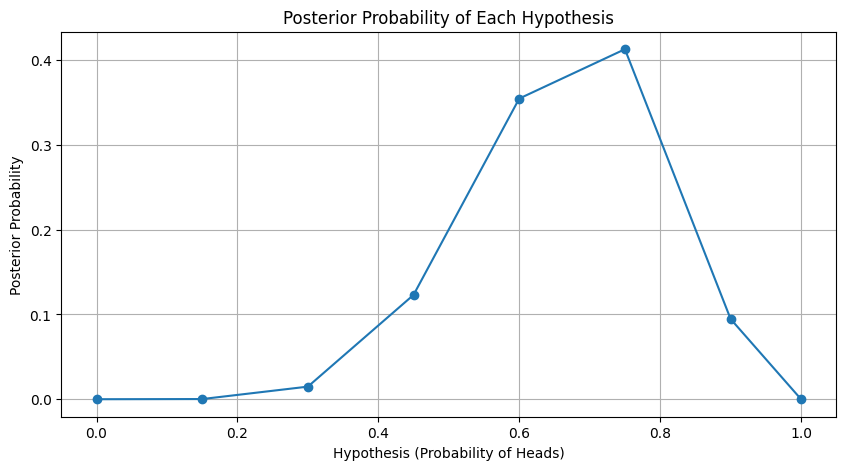

Probability of next coin flip being heads: 0.67
Most likely hypothesis: 0.75


In [31]:
# Question 3_5
import numpy as np
import matplotlib.pyplot as plt

# Hypotheses probabilities
p = np.array([0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1])

# Observations
data = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

# Likelihood function
def likelihood(p, data):
    heads = np.sum(data)
    tails = len(data) - heads
    return p**heads * (1 - p)**tails

# Calculate likelihoods
likelihoods = np.array([likelihood(pi, data) for pi in p])

# Calculate posterior probabilities
posteriors = likelihoods / np.sum(likelihoods)

# Plot posterior probabilities
plt.figure(figsize=(10, 5))
plt.plot(p, posteriors, marker='o')
plt.xlabel('Hypothesis (Probability of Heads)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Each Hypothesis')
plt.grid(True)
plt.show()

# Probability of next coin flip being heads
prob_heads_next = np.sum(p * posteriors)

print(f"Probability of next coin flip being heads: {prob_heads_next:.2f}")

# Most likely hypothesis
most_likely_hypothesis = p[np.argmax(posteriors)]
print(f"Most likely hypothesis: {most_likely_hypothesis:.2f}")


In [34]:
import numpy as np

# Given coin flips: 1 = heads, 0 = tails
flips = [1, 0, 1, 1, 1]
num_flips = len(flips)
num_heads = sum(flips)
num_tails = num_flips - num_heads

# Hypotheses representing the probability of heads (H1 to H8)
probabilities = [0.00, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.00]

# Calculate likelihood for each hypothesis
likelihoods = []
for p in probabilities:
    likelihood = (p ** num_heads) * ((1 - p) ** num_tails)
    likelihoods.append(likelihood)

likelihoods


[0.0,
 0.0004303125,
 0.00567,
 0.022553437500000002,
 0.05184,
 0.0791015625,
 0.06560999999999999,
 0.0]

In [35]:
# New coin flips results
new_flips = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
num_new_flips = len(new_flips)
num_new_heads = sum(new_flips)
num_new_tails = num_new_flips - num_new_heads

# Assuming uniform prior for MAP
priors = [1/8] * len(probabilities)

# Calculate likelihoods for new observations
likelihoods_new = []
for p in probabilities:
    likelihood_new = (p ** num_new_heads) * ((1 - p) ** num_new_tails)
    likelihoods_new.append(likelihood_new)

# Calculate posteriors using Bayes' theorem
posteriors = [likelihoods_new[i] * priors[i] for i in range(len(probabilities))]
sum_posteriors = sum(posteriors)
posteriors = [post / sum_posteriors for post in posteriors]

posteriors


[0.0,
 0.0002076433460746806,
 0.014844491701303116,
 0.12302633689370039,
 0.3545366647728139,
 0.4127349992897524,
 0.09464986399635544,
 0.0]

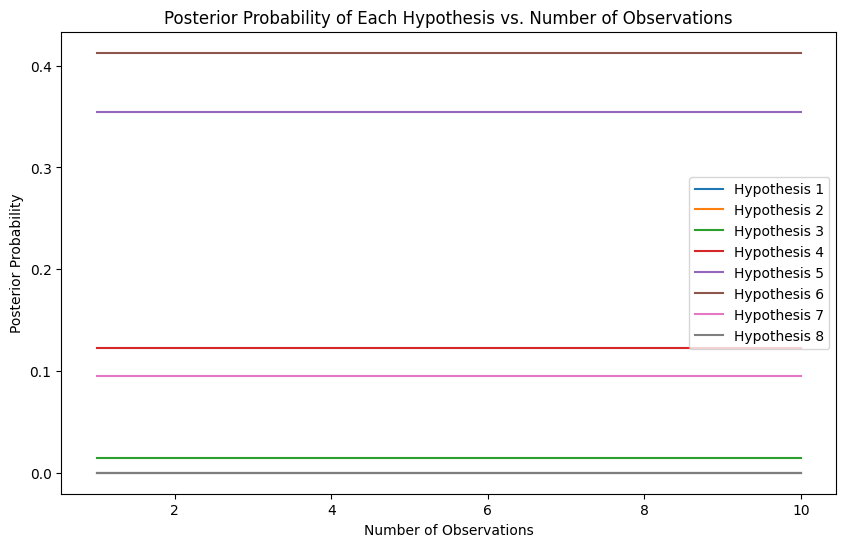

In [36]:
import matplotlib.pyplot as plt

observations = range(1, len(new_flips) + 1)

plt.figure(figsize=(10, 6))
for i in range(len(probabilities)):
    plt.plot(observations,
             [posteriors[i]] * len(observations),
             label=f'Hypothesis {i + 1}')

plt.title('Posterior Probability of Each Hypothesis vs. Number of Observations')
plt.xlabel('Number of Observations')
plt.ylabel('Posterior Probability')
plt.legend()
plt.show()


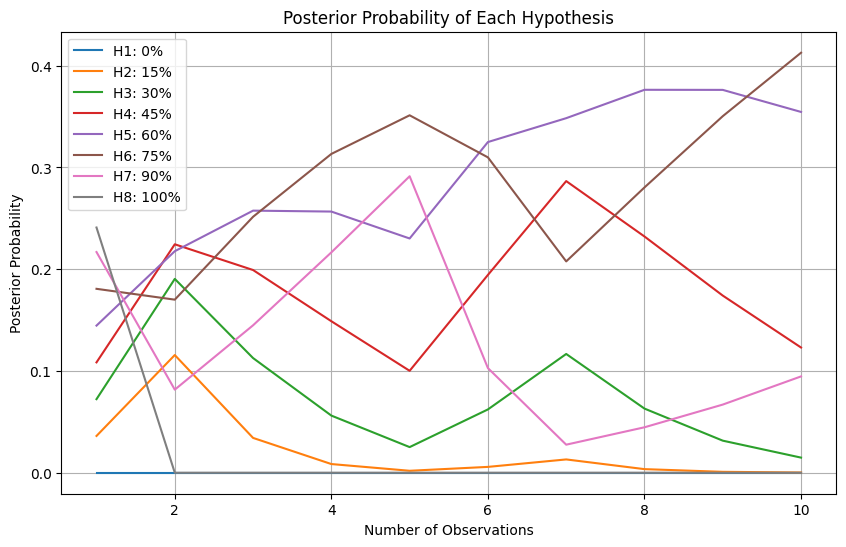

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Coin flip results
data = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

# Hypotheses (probabilities of heads)
hypotheses = np.array([0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.0])

# Prior probabilities (uniform prior)
priors = np.ones(len(hypotheses)) / len(hypotheses)

# Function to compute likelihood
def likelihood(h, data):
    return np.prod(h**data * (1-h)**(1-data))

# Function to compute posterior
def posterior(hypotheses, priors, data):
    likelihoods = np.array([likelihood(h, data) for h in hypotheses])
    posteriors = likelihoods * priors
    return posteriors / np.sum(posteriors)

# Compute posteriors for each number of observations
posteriors = []
for i in range(1, len(data) + 1):
    posteriors.append(posterior(hypotheses, priors, data[:i]))

# Convert to numpy array for easier plotting
posteriors = np.array(posteriors)

# Plotting
plt.figure(figsize=(10, 6))
for i, h in enumerate(hypotheses):
    plt.plot(range(1, len(data) + 1), posteriors[:, i], label=f'H{i+1}: {int(h*100)}%')

plt.xlabel('Number of Observations')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Each Hypothesis')
plt.legend()
plt.grid(True)
plt.show()


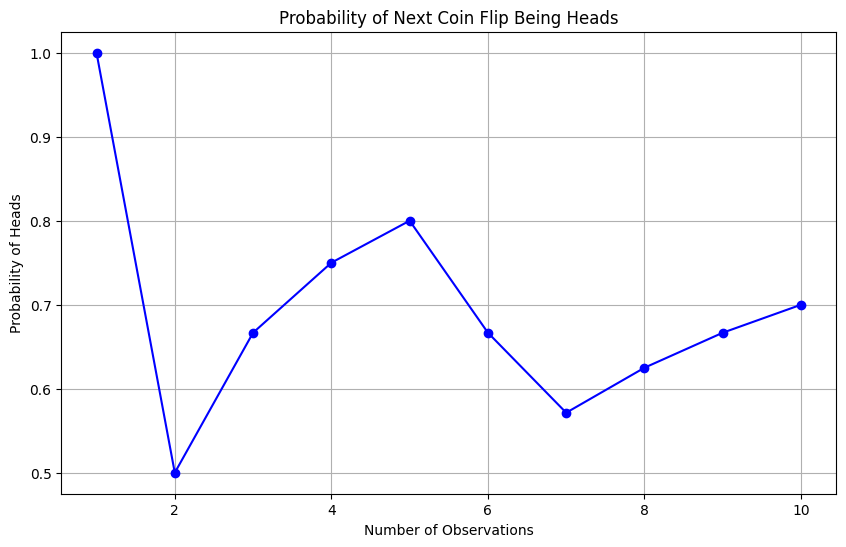

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Coin flip results
data = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

# Function to compute the probability of heads
def probability_of_heads(data):
    return np.cumsum(data) / np.arange(1, len(data) + 1)

# Compute probabilities
probabilities = probability_of_heads(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(data) + 1), probabilities, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Observations')
plt.ylabel('Probability of Heads')
plt.title('Probability of Next Coin Flip Being Heads')
plt.grid(True)
plt.show()


In [40]:
import numpy as np

# Coin flip results
data = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

# Hypotheses (probabilities of heads)
hypotheses = np.array([0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.0])

# Prior probabilities (uniform prior)
priors = np.ones(len(hypotheses)) / len(hypotheses)

# Function to compute likelihood
def likelihood(h, data):
    return np.prod(h**data * (1-h)**(1-data))

# Function to compute posterior
def posterior(hypotheses, priors, data):
    likelihoods = np.array([likelihood(h, data) for h in hypotheses])
    posteriors = likelihoods * priors
    return posteriors / np.sum(posteriors)

# Compute posterior probabilities after all observations
posteriors = posterior(hypotheses, priors, data)

# Find the most likely hypothesis
most_likely_hypothesis_index = np.argmax(posteriors)
most_likely_hypothesis = hypotheses[most_likely_hypothesis_index]

print(f"The most likely hypothesis is H{most_likely_hypothesis_index + 1}: {most_likely_hypothesis * 100}%")


The most likely hypothesis is H6: 75.0%


In [42]:
# Question 3_6
import numpy as np
from scipy.stats import norm

# Given values
n1 = 45  # sample size for cheat sheet users
n2 = 55  # sample size for non-cheat sheet users
mean1 = 88  # mean for cheat sheet users
mean2 = 85  # mean for non-cheat sheet users
std1 = 3   # standard deviation for cheat sheet users
std2 = 2   # standard deviation for non-cheat sheet users

# Calculate pooled standard deviation (Sp)
Sp = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

# Calculate standard error (SE)
SE = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate z-score
z = (mean1 - mean2) / SE

# Calculate p-value for the one-tailed test
p_value = norm.cdf(z)

# Critical z-value for a one-tailed test at 5% significance level
critical_z = norm.ppf(0.95)

print(f"Pooled Standard Deviation (Sp): {Sp}")
print(f"Standard Error (SE): {SE}")
print(f"Z-score: {z}")
print(f"Critical Z-value: {critical_z}")
print(f"P-value: {p_value}")

# Decision based on z-score and critical value
if z > critical_z:
    print("Reject the null hypothesis: Students using cheat sheets perform better.")
else:
    print("Fail to reject the null hypothesis: No significant difference in performance.")


Pooled Standard Deviation (Sp): 2.498979383505129
Standard Error (SE): 0.5222329678670935
Z-score: 5.744562646538029
Critical Z-value: 1.6448536269514722
P-value: 0.9999999953920564
Reject the null hypothesis: Students using cheat sheets perform better.


In [1]:
# ques 3_6_5
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the interactive widgets
mu1_slider = widgets.IntSlider(value=90, min=85, max=95, step=1, description='Mean (µ1)')
mu2_slider = widgets.IntSlider(value=85, min=80, max=90, step=1, description='Mean (µ2)')
sigma1_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Std Dev (σ1)')
sigma2_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Std Dev (σ2)')
n1_slider = widgets.IntSlider(value=100, min=20, max=200, step=10, description='Sample Size (n1)')
n2_slider = widgets.IntSlider(value=100, min=20, max=200, step=10, description='Sample Size (n2)')

# Function to perform the simulation and plot results
def simulate(mu1, mu2, sigma1, sigma2, n1, n2):
    # Calculate pooled standard deviation
    sp = np.sqrt(((n1 - 1) * sigma1**2 + (n2 - 1) * sigma2**2) / (n1 + n2 - 2))
    # Calculate standard error
    se = sp * np.sqrt(1/n1 + 1/n2)
    # Calculate z-score
    z = (mu1 - mu2) / se
    # Calculate p-value
    p_value = 1 - stats.norm.cdf(z)
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.bar(['z-score', 'p-value'], [z, p_value], color=['blue', 'orange'])
    plt.axhline(y=1.645, color='r', linestyle='--', label='Critical Value (1.645)')
    plt.title('Z-test Simulation')
    plt.legend()
    plt.show()

# Create interactive plot
widgets.interactive(simulate, mu1=mu1_slider, mu2=mu2_slider, sigma1=sigma1_slider, sigma2=sigma2_slider, n1=n1_slider, n2=n2_slider)


interactive(children=(IntSlider(value=90, description='Mean (µ1)', max=95, min=85), IntSlider(value=85, descri…

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the interactive widgets
mu1_slider = widgets.IntSlider(value=90, min=85, max=95, step=1, description='Mean (µ1)')
mu2_slider = widgets.IntSlider(value=85, min=80, max=90, step=1, description='Mean (µ2)')
sigma1_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Std Dev (σ1)')
sigma2_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Std Dev (σ2)')
n1_slider = widgets.IntSlider(value=100, min=20, max=200, step=10, description='Sample Size (n1)')
n2_slider = widgets.IntSlider(value=100, min=20, max=200, step=10, description='Sample Size (n2)')

# Function to perform the simulation and plot results
def simulate(mu1, mu2, sigma1, sigma2, n1, n2):
    # Calculate pooled standard deviation
    sp = np.sqrt(((n1 - 1) * sigma1**2 + (n2 - 1) * sigma2**2) / (n1 + n2 - 2))
    # Calculate standard error
    se = sp * np.sqrt(1/n1 + 1/n2)
    # Calculate z-score
    z = (mu1 - mu2) / se
    # Calculate p-value
    p_value = 1 - stats.norm.cdf(z)
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(['z-score'], [z], color='blue')
    plt.axhline(y=1.645, color='r', linestyle='--', label='Critical Value (1.645)')
    plt.title('Z-score')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.bar(['p-value'], [p_value], color='orange')
    plt.title('P-value')
    
    plt.suptitle('Z-test Simulation')
    plt.show()

# Create interactive plot
widgets.interactive(simulate, mu1=mu1_slider, mu2=mu2_slider, sigma1=sigma1_slider, sigma2=sigma2_slider, n1=n1_slider, n2=n2_slider)


interactive(children=(IntSlider(value=90, description='Mean (µ1)', max=95, min=85), IntSlider(value=85, descri…

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the interactive widgets
muA_slider = widgets.IntSlider(value=90, min=85, max=95, step=1, description='Group A Mean')
muB_slider = widgets.IntSlider(value=85, min=80, max=90, step=1, description='Group B Mean')
sigmaA_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Group A Std')
sigmaB_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Group B Std')
nA_slider = widgets.IntSlider(value=100, min=20, max=200, step=5, description='Group A size')
nB_slider = widgets.IntSlider(value=100, min=20, max=200, step=5, description='Group B size')

# Perform simulation 
def simulate(muA, muB, sigmaA, sigmaB, nA, nB):
    # pooled std
    sp = np.sqrt(((nA - 1) * sigmaA**2 + (nB - 1) * sigmaB**2) / (nA + nB - 2))
    #  standard error
    se = sp * np.sqrt(1/nA + 1/nB)
    # z-score
    z = (muA - muB) / se
    # p-value
    p_value = 1 - stats.norm.cdf(z)
    
    # Plots
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(['z-score'], [z], color='blue')
    plt.axhline(y=1.645, color='r', linestyle='--', label='Critical Value (1.645)')
    plt.title('Z-score')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.bar(['p-value'], [p_value], color='orange')
    plt.title('P-value')
    
    plt.suptitle('Z-test Simulation')
    plt.show()

# Create interactive plot
widgets.interactive(simulate, muA=muA_slider, muB=muB_slider, sigmaA=sigmaA_slider, sigmaB=sigmaB_slider, nA=nA_slider, nB=nB_slider)


interactive(children=(IntSlider(value=90, description='Group A Mean', max=95, min=85), IntSlider(value=85, des…

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the interactive widgets
muA_slider = widgets.IntSlider(value=90, min=85, max=95, step=1, description='Group A Mean')
muB_slider = widgets.IntSlider(value=85, min=80, max=90, step=1, description='Group B Mean')
sigmaA_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Group A Std')
sigmaB_slider = widgets.FloatSlider(value=2.5, min=1, max=5, step=0.1, description='Group B Std')
nA_slider = widgets.IntSlider(value=100, min=20, max=200, step=5, description='Group A size')
nB_slider = widgets.IntSlider(value=100, min=20, max=200, step=5, description='Group B size')

# Perform simulation 
def simulate(muA, muB, sigmaA, sigmaB, nA, nB):
    # pooled std
    sp = np.sqrt(((nA - 1) * sigmaA**2 + (nB - 1) * sigmaB**2) / (nA + nB - 2))
    #  standard error
    se = np.sqrt(sigmaA**2/nA + sigmaB**2/nB)
    # z-score
    z = (muA - muB) / se
    # p-value
    p_value = 1 - stats.norm.cdf(z)
    
    # Print z-score and p-value
    print(f"Z-score: {z}")
    print(f"P-value: {p_value}")
    
    # Plots
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(['z-score'], [z], color='blue')
    plt.axhline(y=1.645, color='r', linestyle='--', label='Critical Value (1.645)')
    plt.title('Z-score')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.bar(['p-value'], [p_value], color='orange')
    plt.title('P-value')
    
    plt.suptitle('Z-test Simulation')
    plt.show()

# Create interactive plot
interactive_plot = widgets.interactive(simulate, muA=muA_slider, muB=muB_slider, sigmaA=sigmaA_slider, sigmaB=sigmaB_slider, nA=nA_slider, nB=nB_slider)
display(interactive_plot)


interactive(children=(IntSlider(value=90, description='Group A Mean', max=95, min=85), IntSlider(value=85, des…

In [11]:
import numpy as np

# Step 1: Mean Centering
Y = np.array([[1.2, 2.8],
              [0.8, 2.4],
              [1.6, 3.2],
              [1.4, 2.9]])

# (a) Compute the mean of the dataset for each feature Y1 and Y2
mean_Y = np.mean(Y, axis=0)
print("Mean of each feature:", mean_Y)

# (b) Subtract the mean from each feature to center the data
Y_centered = Y - mean_Y
print("Centered data:\n", Y_centered)

# Step 2: Covariance Matrix
# (a) Calculate the covariance matrix for the centered dataset
cov_matrix = np.cov(Y_centered, rowvar=False)
print("Covariance matrix:\n", cov_matrix)

# Step 3: Eigenvalue Decomposition
# (a) Manually compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# (b) Identify the principal components by determining which eigenvalue is larger
principal_component = eigenvectors[:, np.argmax(eigenvalues)]
print("Principal component:", principal_component)

# Step 4: Project the Data
# (a) Using the principal component corresponding to the largest eigenvalue, project the original data onto the principal component axis
Y_projected = np.dot(Y_centered, principal_component)
print("Projected data (1D):", Y_projected)

# (b) Show the final transformed data in 1D (along the principal component axis)
print("Final transformed data in 1D:\n", Y_projected)


Mean of each feature: [1.25  2.825]
Centered data:
 [[-0.05  -0.025]
 [-0.45  -0.425]
 [ 0.35   0.375]
 [ 0.15   0.075]]
Covariance matrix:
 [[0.11666667 0.11166667]
 [0.11166667 0.10916667]]
Eigenvalues: [0.22464628 0.00118705]
Eigenvectors:
 [[ 0.71887522 -0.69513913]
 [ 0.69513913  0.71887522]]
Principal component: [0.71887522 0.69513913]
Projected data (1D): [-0.05332224 -0.61892798  0.5122835   0.15996672]
Final transformed data in 1D:
 [-0.05332224 -0.61892798  0.5122835   0.15996672]


In [13]:
# Import libraries
import pandas as pd

data = pd.read_csv("user_activity_data.csv")
data.cov()

,Usage Time (minutes),Interactions,Activity Type 1,Activity Type 2
Usage Time (minutes),385.143174,2.892147,-3.147290,1.703028
Interactions,2.892147,33.422922,-1.638074,0.555387
Activity Type 1,-3.147290,-1.638074,24.566131,-1.052789
Activity Type 2,1.703028,0.555387,-1.052789,8.352480


In [21]:
import numpy as np
from scipy.linalg import eigh
# Standardize the data (centering each feature)
data_centered = data - data.mean()

# Convert data to numpy array for easier manipulation
data_array = data_centered.to_numpy()

# Calculate covariance matrix manually (optional)
cov_matrix_manual = np.cov(data_array, rowvar=False)

# Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = eigh(cov_matrix_manual)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [385.20247624  33.70345427  24.30801924   8.27075746]
Eigenvectors:
 [[ 0.99991691  0.00981203  0.00741691 -0.00385725]
 [ 0.00826886 -0.98389093  0.17771336 -0.01755614]
 [-0.00877718  0.17625618  0.98235299  0.06196225]
 [ 0.00455545 -0.0282155  -0.05784073  0.99791662]]


In [29]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA()
pca.fit(data)

#Calculate eigen velues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)



Eigenvalues: [385.20247624  33.70345427  24.30801924   8.27075746]
Eigenvectors:
 [[ 0.99991691  0.00826886 -0.00877718  0.00455545]
 [-0.00981203  0.98389093 -0.17625618  0.0282155 ]
 [ 0.00741691  0.17771336  0.98235299 -0.05784073]
 [-0.00385725 -0.01755614  0.06196225  0.99791662]]


In [38]:
data.cov()

,Usage Time (minutes),Interactions,Activity Type 1,Activity Type 2
Usage Time (minutes),385.143174,2.892147,-3.147290,1.703028
Interactions,2.892147,33.422922,-1.638074,0.555387
Activity Type 1,-3.147290,-1.638074,24.566131,-1.052789
Activity Type 2,1.703028,0.555387,-1.052789,8.352480


In [31]:
# Number of components to retain 90% of the total variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.90) + 1

# print("Cumulative Variance:", cumulative_variance)
print("Number of Components for 90% Variance:", num_components)

Cumulative Variance: [0.85319053 0.9278408  0.98168098 1.        ]
Number of Components for 90% Variance: 2


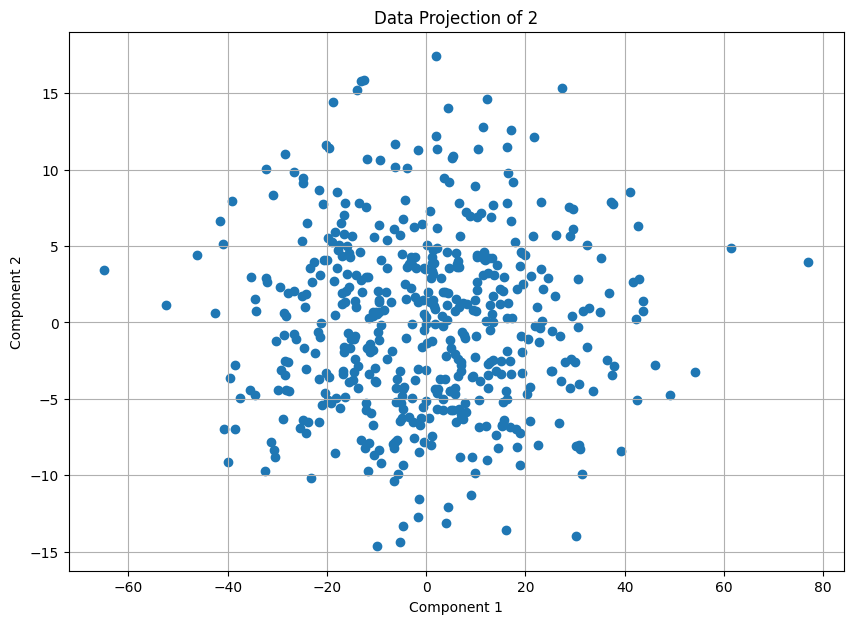

In [37]:
import matplotlib.pyplot as plt

# Project the data onto the first two principal components
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

# 2D Scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.title("Data Projection of 2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [39]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA()
pca.fit(data)

# Eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Determine number of components to retain at least 90% of the variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.90) + 1

print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratios:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)
print("Number of Components for 90% Variance:", num_components)


Eigenvalues: [385.20247624  33.70345427  24.30801924   8.27075746]
Explained Variance Ratios: [0.85319053 0.07465027 0.05384018 0.01831902]
Cumulative Variance: [0.85319053 0.9278408  0.98168098 1.        ]
Number of Components for 90% Variance: 2


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_28108\3339174824.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette='viridis', s=60, edgecolor='k', alpha=0.7)


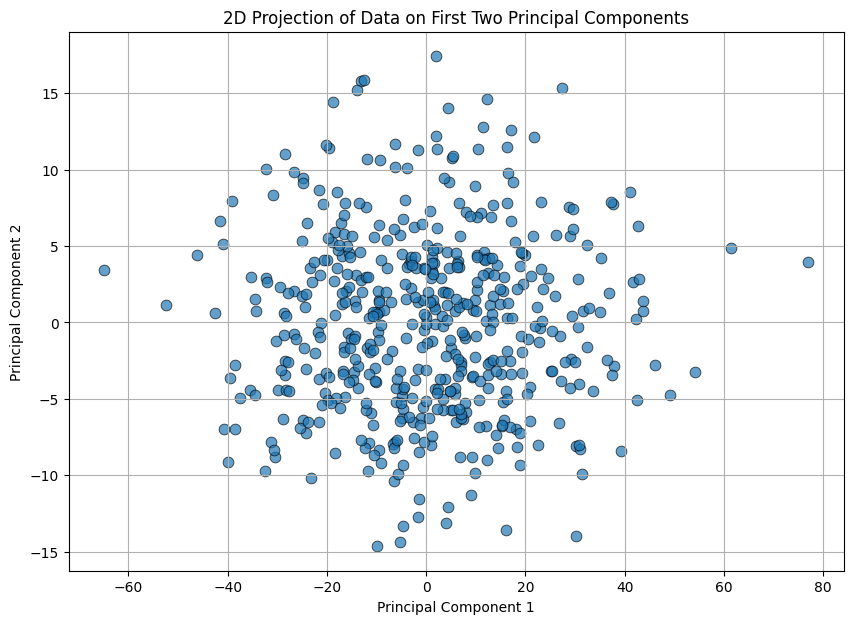

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA and project the data onto the first two principal components
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data)

# Convert the projected data to a DataFrame for easy plotting with seaborn
pca_df = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])

# Create the scatter plot with Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette='viridis', s=60, edgecolor='k', alpha=0.7)
plt.title("2D Projection of Data on First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [33]:
import seaborn as sns
# Project the number of components
pc2 = PCA(n_components=2)
data_pc2 = pc2.fit_transform(data)

# Plot a 2D scatter plot
sns.scatterplot(data_pc2[:, 0], data_pc2[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
import pandas as pd

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [28]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA()
pca.fit(data)

# Eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Eigenvectors
eigenvectors = pca.components_

# Determine number of components to retain at least 90% of the variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.90) + 1

print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratios:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)
print("Number of Components for 90% Variance:", num_components)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [385.20247624  33.70345427  24.30801924   8.27075746]
Explained Variance Ratios: [0.85319053 0.07465027 0.05384018 0.01831902]
Cumulative Variance: [0.85319053 0.9278408  0.98168098 1.        ]
Number of Components for 90% Variance: 2
Eigenvectors:
 [[ 0.99991691  0.00826886 -0.00877718  0.00455545]
 [-0.00981203  0.98389093 -0.17625618  0.0282155 ]
 [ 0.00741691  0.17771336  0.98235299 -0.05784073]
 [-0.00385725 -0.01755614  0.06196225  0.99791662]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to calculate bounds
def calculate_bounds(c, samples):
    empirical_prob = np.mean(samples >= c)
    markov_bound = np.mean(samples) / c
    chebyshev_bound = 1 / (c**2)
    chernoff_bound = np.exp(-c**2 / 2)
    return empirical_prob, markov_bound, chebyshev_bound, chernoff_bound

# Function to update plot
def update_plot(n, c):
    samples = np.random.normal(0, 1, n)
    empirical_prob, markov_bound, chebyshev_bound, chernoff_bound = calculate_bounds(c, samples)
    
    plt.figure(figsize=(10, 6))
    plt.bar(['Empirical', 'Markov', 'Chebyshev', 'Chernoff'], 
            [empirical_prob, markov_bound, chebyshev_bound, chernoff_bound], 
            color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)
    plt.title(f'Comparison of Bounds for n={n} and c={c}')
    plt.ylabel('Probability')
    plt.show()

# Interactive widgets
n_slider = widgets.IntSlider(value=1000, min=1000, max=100000, step=1000, description='Sample Size (n)')
c_slider = widgets.FloatSlider(value=0.5, min=0.5, max=3.0, step=0.1, description='Threshold (c)')

widgets.interactive(update_plot, n=n_slider, c=c_slider)


interactive(children=(IntSlider(value=1000, description='Sample Size (n)', max=100000, min=1000, step=1000), F…

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Step 1: Generate Samples
def generate_samples(n):
    return np.random.normal(0, 1, n)

# Step 2: Compute Empirical Probability
def compute_empirical_probability(samples, c):
    return np.mean(samples >= c)

# Step 3: Calculate Bounds
def calculate_bounds(samples, c):
    mean_X = np.mean(samples)
    var_X = np.var(samples)
    
    markov_bound = mean_X / c
    chebyshev_bound = var_X / (c - mean_X) ** 2
    chernoff_bound = np.exp(-((c - mean_X) ** 2) / (2 * var_X))
    
    return markov_bound, chebyshev_bound, chernoff_bound

# Step 4: Plot Results
def plot_results(n, c):
    samples = generate_samples(n)
    empirical_prob = compute_empirical_probability(samples, c)
    markov_bound, chebyshev_bound, chernoff_bound = calculate_bounds(samples, c)
    
    plt.figure(figsize=(10, 6))
    plt.bar(['Empirical', 'Markov', 'Chebyshev', 'Chernoff'], 
            [empirical_prob, markov_bound, chebyshev_bound, chernoff_bound], 
            color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)
    plt.title(f'Comparison of Bounds for n={n} and c={c}')
    plt.ylabel('Probability')
    plt.show()

# Step 5: Dynamic Visualization
n_slider = widgets.IntSlider(value=1000, min=1000, max=100000, step=1000, description='Sample Size (n)')
c_slider = widgets.FloatSlider(value=0.5, min=0.5, max=3.0, step=0.1, description='Threshold (c)')

widgets.interactive(plot_results, n=n_slider, c=c_slider)


interactive(children=(IntSlider(value=1000, description='Sample Size (n)', max=100000, min=1000, step=1000), F…

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import ipywidgets as widgets
from IPython.display import display

# Define parameters
mu = 0         # Mean of the Gaussian distribution
sigma = 1      # Standard deviation of the Gaussian distribution
samples = np.linspace(0, 10000, 10001)  # Sample size range

# Generate samples
X = np.random.normal(mu, sigma, int(samples[-1]))

def empirical_probability(X, c):
    return np.mean(X >= c)

def markov_bound(c):
    return np.mean(X) / c

def chebyshev_bound(c):
    return 1 / (1 + c**2)

def chernoff_bound(c):
    return np.exp(-(c**2) / 2)


# Define range of c values
c_values = np.linspace(0.5, 3.0, 50)

# Calculate probabilities
empirical_probs = [empirical_probability(X, c) for c in c_values]
markov_bounds = [markov_bound(c) for c in c_values]
chebyshev_bounds = [chebyshev_bound(c) for c in c_values]
chernoff_bounds = [chernoff_bound(c) for c in c_values]


# Function to update plot based on slider value
def update_plot(c):
    plt.figure(figsize=(12, 6))
    plt.plot(c_values, empirical_probs, label="Empirical Probability", marker='o')
    plt.plot(c_values, markov_bounds, label="Markov Bound", linestyle='--')
    plt.plot(c_values, chebyshev_bounds, label="Chebyshev Bound", linestyle='-.')
    plt.plot(c_values, chernoff_bounds, label="Chernoff Bound", linestyle=':')
    plt.axvline(x=c, color='r', linestyle='-', label=f"Threshold c = {c}")
    plt.xlabel("Threshold c")
    plt.ylabel("Probability P(X ≥ c)")
    plt.title("Interactive Comparison of Empirical Probability and Bounds")
    plt.legend()
    plt.show()

# Create a slider for adjusting c
c_slider = widgets.FloatSlider(value=1.5, min=0.5, max=3.0, step=0.1, description='c')
widgets.interactive(update_plot, c=c_slider)



interactive(children=(FloatSlider(value=1.5, description='c', max=3.0, min=0.5), Output()), _dom_classes=('wid…

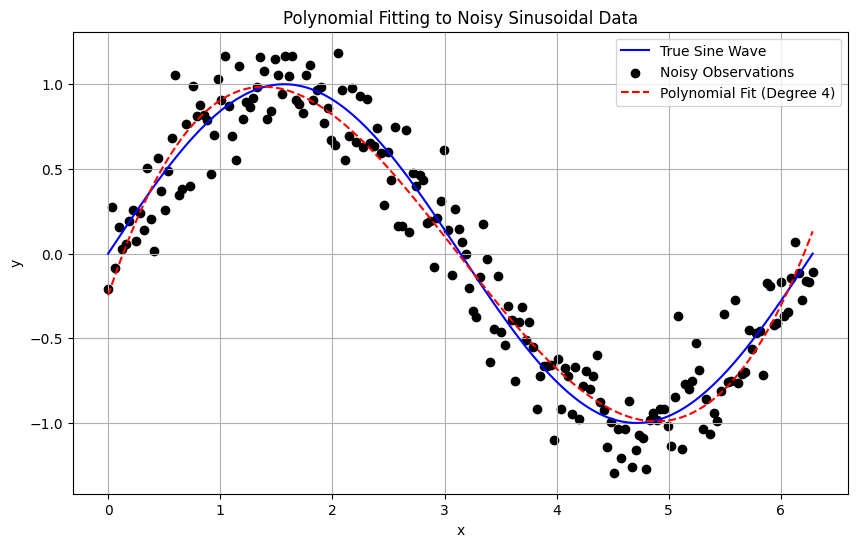

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to fit polynomial with adjustable parameters
def fit_polynomial(n_observations=100, noise_level=0.1, poly_degree=3):
    # Generate x values and the true sine wave
    x = np.linspace(0, 2 * np.pi, n_observations)
    y_true = np.sin(x)  # True sine function
    noise = noise_level * np.random.randn(n_observations)  # Generate random noise
    y_noisy = y_true + noise  # Add noise to the true signal

    # Fit the polynomial to the noisy data
    coefficients = np.polyfit(x, y_noisy, poly_degree)

    # Evaluate the polynomial using the fitted coefficients
    y_fit = np.polyval(coefficients, x)

    # Plotting results
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_true, 'b-', label='True Sine Wave')  # True sine wave
    plt.scatter(x, y_noisy, color='k', label='Noisy Observations')  # Noisy observations
    plt.plot(x, y_fit, 'r--', label=f'Polynomial Fit (Degree {poly_degree})')  # Fitted polynomial
    plt.legend()  # Show legend
    plt.xlabel('x')  # x-axis label
    plt.ylabel('y')  # y-axis label
    plt.title('Polynomial Fitting to Noisy Sinusoidal Data')  # Title of the plot
    plt.grid()  # Add grid to the plot
    plt.show()  # Display the plot

# Example of using the function with varying parameters
fit_polynomial(n_observations=200, noise_level=0.2, poly_degree=4)